## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# application_df = application_df.drop(columns=["EIN", "NAME"], axis=1)
application_df = application_df.drop(columns=["EIN", "NAME", "STATUS"], axis=1)

In [4]:
# Update SPECIAL_CONSIDERATIONS to binary
application_df["SPECIAL_CONSIDERATIONS"] = application_df["SPECIAL_CONSIDERATIONS"].replace({"Y": 1, "N": 0})

In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_df["APPLICATION_TYPE"].value_counts()[application_df["APPLICATION_TYPE"].value_counts() < 1000].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df["CLASSIFICATION"].value_counts()[application_df["CLASSIFICATION"].value_counts() > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(application_df["CLASSIFICATION"].value_counts()[application_df["CLASSIFICATION"].value_counts() < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [11]:
application_df['USE_CASE'].value_counts()

USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

In [12]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_df["USE_CASE"].value_counts()[application_df["USE_CASE"].value_counts() < 5000].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['USE_CASE'] = application_df['USE_CASE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['USE_CASE'].value_counts()

USE_CASE
Preservation    28095
ProductDev       5671
Other             533
Name: count, dtype: int64

In [13]:
application_df['AFFILIATION'].value_counts()

AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64

In [14]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_df["AFFILIATION"].value_counts()[application_df["AFFILIATION"].value_counts() < 5000].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['AFFILIATION'] = application_df['AFFILIATION'].replace(app,"Other")

# Check to make sure binning was successful
application_df['AFFILIATION'].value_counts()

AFFILIATION
Independent         18480
CompanySponsored    15705
Other                 114
Name: count, dtype: int64

In [15]:
application_df['ORGANIZATION'].value_counts()

ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: count, dtype: int64

In [16]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_df["ORGANIZATION"].value_counts()[application_df["ORGANIZATION"].value_counts() < 5000].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['ORGANIZATION'] = application_df['ORGANIZATION'].replace(app,"Other")

# Check to make sure binning was successful
application_df['ORGANIZATION'].value_counts()

ORGANIZATION
Trust          23515
Association    10255
Other            529
Name: count, dtype: int64

In [17]:
application_df["INCOME_AMT"].value_counts()

INCOME_AMT
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: count, dtype: int64

In [18]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# application_types_to_replace = list(application_df["INCOME_AMT"].value_counts()[application_df["INCOME_AMT"].value_counts() < 5000].index)

# Replace 1-9999 and 10000-24999 in INCOME_AMT with 1-24999
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace({"1-9999": "1-24999", "10000-24999": "1-24999", "1M-5M": "1M+", "5M-10M": "1M+", "10M-50M": "1M+", "50M+": "1M+"})

# Check to make sure binning was successful
application_df['INCOME_AMT'].value_counts()

INCOME_AMT
0                24388
25000-99999       3747
100000-499999     3374
1M+               1519
1-24999           1271
Name: count, dtype: int64

In [19]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,0,0,5000,1
1,T3,Independent,C2000,Preservation,Other,1-24999,0,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1-24999,0,6692,1
4,T3,Independent,C1000,Other,Trust,100000-499999,0,142590,1


In [20]:
application_df.nunique()

APPLICATION_TYPE             6
AFFILIATION                  3
CLASSIFICATION               6
USE_CASE                     3
ORGANIZATION                 3
INCOME_AMT                   5
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [21]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   INCOME_AMT              34299 non-null  object
 6   SPECIAL_CONSIDERATIONS  34299 non-null  int64 
 7   ASK_AMT                 34299 non-null  int64 
 8   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.4+ MB


In [22]:
# application_df.drop(columns=["SPECIAL_CONSIDERATIONS", "ORGANIZATION", "USE_CASE"], axis=1, inplace=True)

In [23]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

# Update True/False columns to 1/0
application_df = application_df.replace({True:1, False:0})

application_df.head()

,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M+,INCOME_AMT_25000-99999
0,0,5000,1,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
1,0,108590,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,0,5000,0,0,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,0
3,0,6692,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,142590,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [24]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [25]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
print(len(X_train[0]))

28


## Compile, Train and Evaluate the Model

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=28, activation="relu", input_dim=number_input_features))

# 2nd hidden layer
nn.add(tf.keras.layers.Dense(units=4, activation="relu"))

# 3rd hidden layer
nn.add(tf.keras.layers.Dense(units=4, activation="relu"))

# 4th hidden layer
# nn.add(tf.keras.layers.Dense(units=4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                812       
                                                                 
 dense_1 (Dense)             (None, 28)                812       
                                                                 
 dense_2 (Dense)             (None, 28)                812       
                                                                 
 dense_3 (Dense)             (None, 1)                 29        
                                                                 
Total params: 2465 (9.63 KB)
Trainable params: 2465 (9.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=300)

Epoch 1/300
804/804 [==============================] - 1s 732us/step - loss: 0.5743 - accuracy: 0.7194
Epoch 2/300
804/804 [==============================] - 1s 716us/step - loss: 0.5585 - accuracy: 0.7290
Epoch 3/300
804/804 [==============================] - 1s 715us/step - loss: 0.5552 - accuracy: 0.7302
Epoch 4/300
804/804 [==============================] - 1s 723us/step - loss: 0.5541 - accuracy: 0.7325
Epoch 5/300
804/804 [==============================] - 1s 735us/step - loss: 0.5527 - accuracy: 0.7320
Epoch 6/300
804/804 [==============================] - 1s 712us/step - loss: 0.5521 - accuracy: 0.7327
Epoch 7/300
804/804 [==============================] - 1s 702us/step - loss: 0.5513 - accuracy: 0.7328
Epoch 8/300
804/804 [==============================] - 1s 686us/step - loss: 0.5505 - accuracy: 0.7333
Epoch 9/300
804/804 [==============================] - 1s 710us/step - loss: 0.5507 - accuracy: 0.7331
Epoch 10/300
804/804 [==============================] - 1s 726us/step - l

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Loss: 0.5554059743881226, Accuracy: 0.7258309125900269 - 4 NODES, 3 HIDDEN LAYERS
# Loss: 0.556983470916748, Accuracy: 0.726064145565033 - 6 NODES
# Loss: 0.5570246577262878, Accuracy: 0.7262973785400391 - 10 NODES
# Loss: 0.5572429895401001, Accuracy: 0.7264139652252197 - 6 NODES, 2 HIDDEN LAYERS
# Loss: 0.5564694404602051, Accuracy: 0.7271137237548828 - 2 NODES, 2 HIDDEN LAYERS
# Loss: 0.5539696216583252, Accuracy: 0.7273469567298889 - 4 NODES
# Loss: 0.5572041273117065, Accuracy: 0.727580189704895 - 4 NODES, 2 HIDDEN LAYERS


268/268 - 0s - loss: 0.5685 - accuracy: 0.7266 - 264ms/epoch - 984us/step
Loss: 0.5684513449668884, Accuracy: 0.7266472578048706


<Axes: >

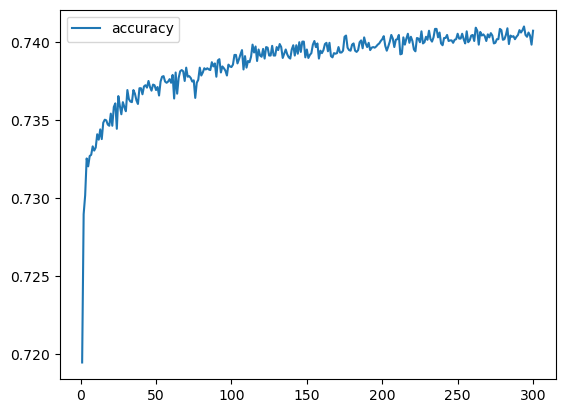

In [31]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [32]:
import h5py

# Export our model to HDF5 file
# Warning said HDF5 file was legacy file format, so I used h5 instead of hdf5.
with h5py.File('AlphabetSoupCharity_Optimization.h5', 'w') as f:
    nn.save(f)

c:\Users\inlik\anaconda3\envs\dev2\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
